# Exploratory Data Analysis on Flora dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src/data')))
sys.path.append(os.path.abspath(os.path.join('..', 'src/eda')))
from eda import *
from sklearn.datasets import fetch_openml
from dataset_interface import DataInterface
from data_loader import OpenMLDataLoader

In [2]:
dataset = DataInterface(OpenMLDataLoader(dataset_name='arrhythmia'))

## Basic dataset info

In [3]:
print_basic_info(dataset.data)


Dataset shape:
(452, 279)

Dataset features count:
279

Dataset observation count:
452

Dataset description:
              age      height      weight  QRSduration  PRinterval  \
count  452.000000  452.000000  452.000000   452.000000  452.000000   
mean    46.471239  166.188053   68.170354    88.920354  155.152655   
std     16.466631   37.170340   16.590803    15.364394   44.842283   
min      0.000000  105.000000    6.000000    55.000000    0.000000   
25%     36.000000  160.000000   59.000000    80.000000  142.000000   
50%     47.000000  164.000000   68.000000    86.000000  157.000000   
75%     58.000000  170.000000   79.000000    94.000000  175.000000   
max     83.000000  780.000000  176.000000   188.000000  524.000000   

       Q-Tinterval   Tinterval   Pinterval         QRS           T  ...  \
count   452.000000  452.000000  452.000000  452.000000  444.000000  ...   
mean    367.207965  169.949115   90.004425   33.676991   36.150901  ...   
std      33.385421   35.633072   2

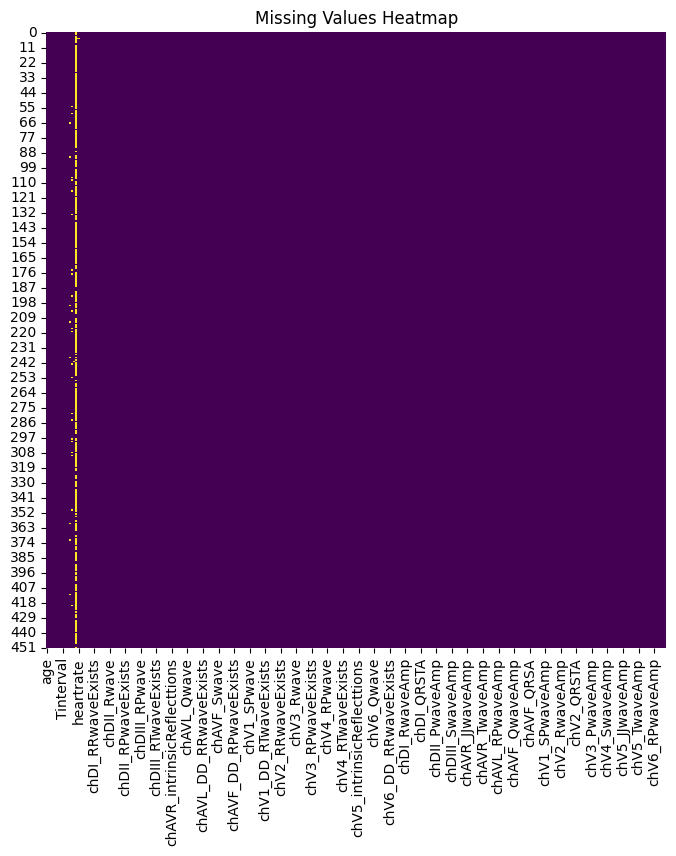

In [4]:
fig = figure_missing_values(dataset.data, (8,8))

## Target distribution

In [5]:
print_target_distribution_info(dataset.data)

       Count  Percentage
class                   
1        245   54.203540
10        50   11.061947
2         44    9.734513
6         25    5.530973
16        22    4.867257
4         15    3.318584
3         15    3.318584
5         13    2.876106
9          9    1.991150
15         5    1.106195
14         4    0.884956
7          3    0.663717
8          2    0.442478


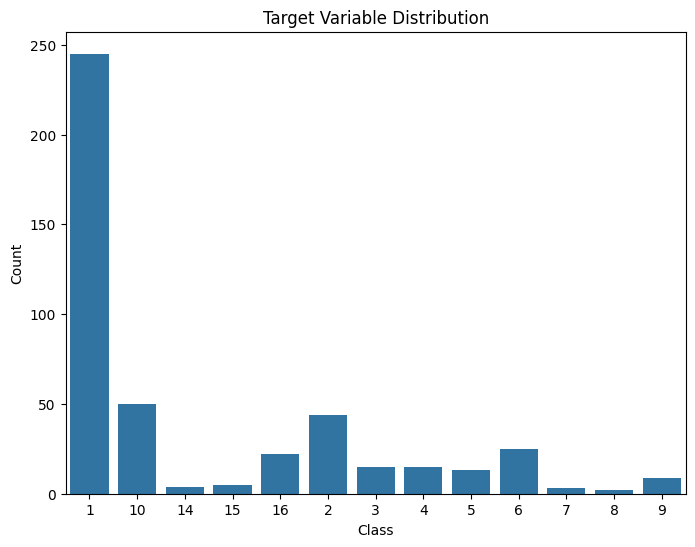

In [6]:
fig = figure_target_distribution(dataset.data)

## Features distribution

<Figure size 1500x1500 with 0 Axes>

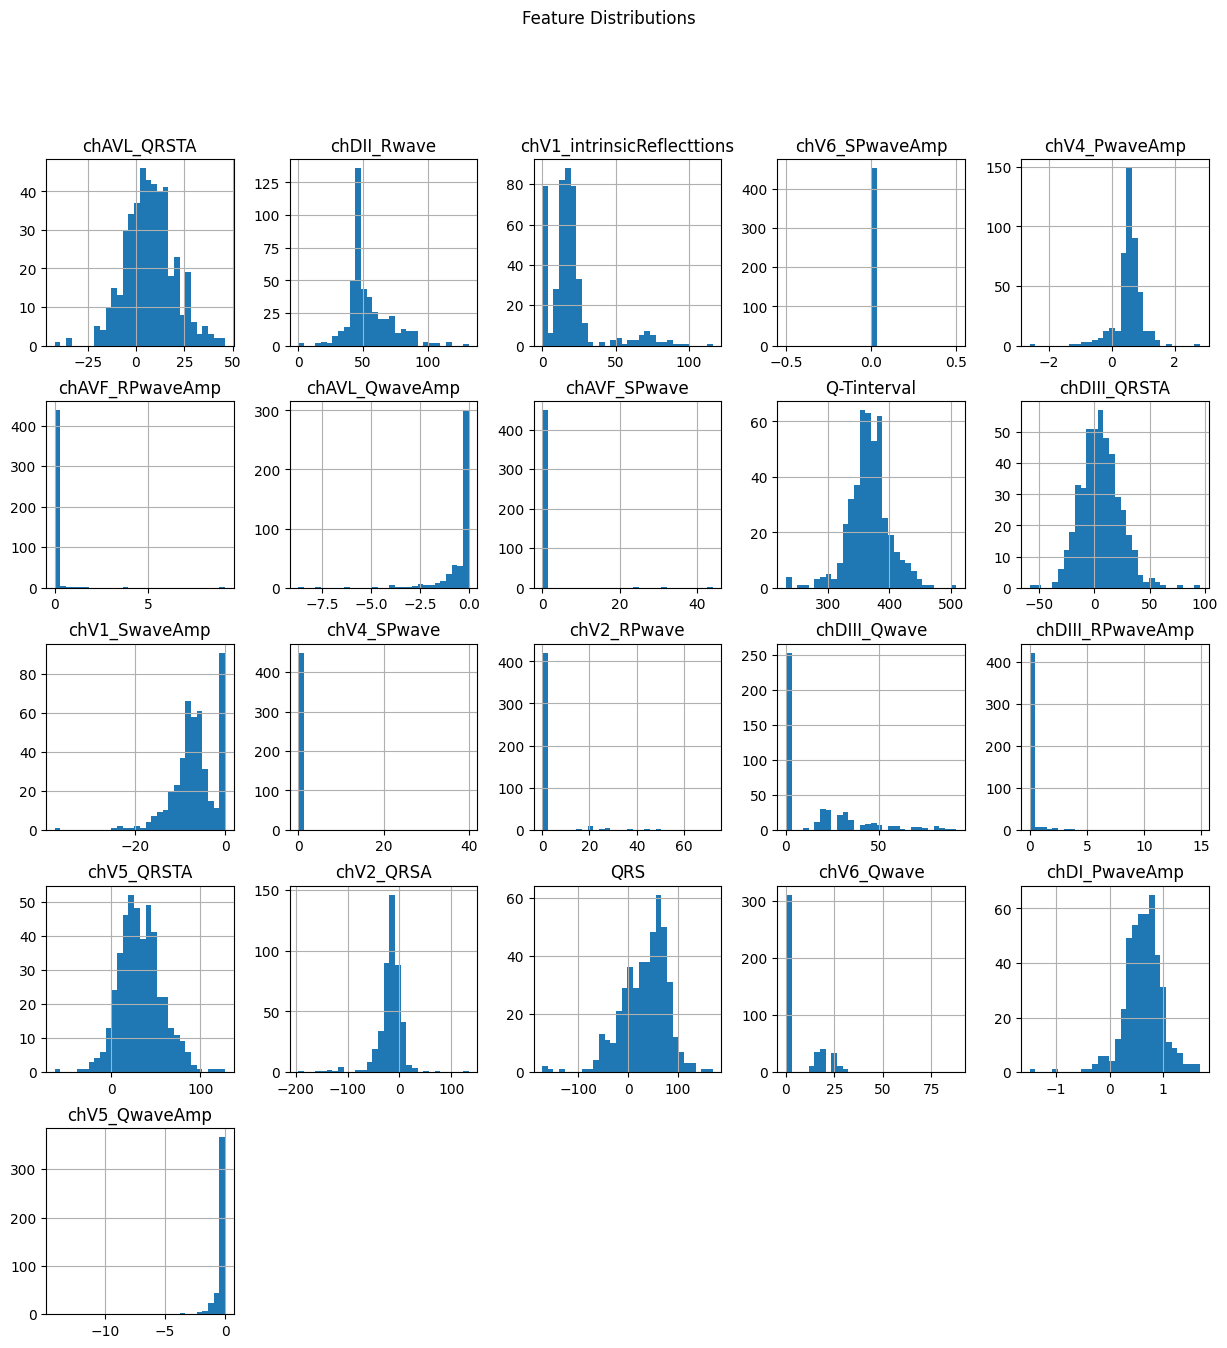

In [7]:
fig = figure_feature_distributions(dataset.data, num_features=30)

## Features correlation

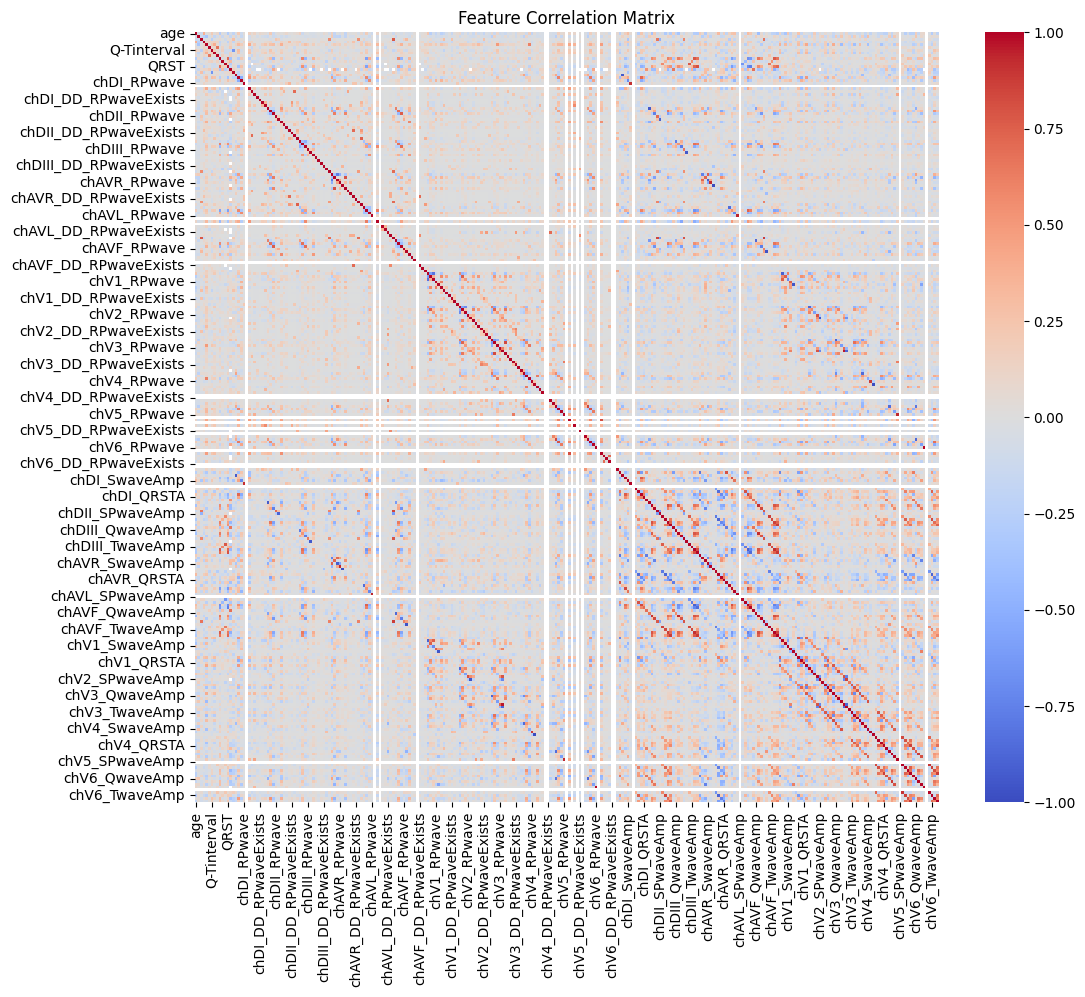

In [8]:
fig = figure_correlation_matrix(dataset.data)

## Data preprocessing

In [3]:
dataset.preprocess_data(missing_values_strategy='drop features')

Removed 7 correlated features.


## Features importance

In [10]:
print(feature_variance_explained(dataset.data))

                   Variance Explained
chV5_SwaveAmp            5.388919e-02
chAVF_JJwaveAmp          5.350966e-02
chV2_Swave               5.334180e-02
chV5_Swave               5.283930e-02
chDIII_JJwaveAmp         5.263899e-02
...                               ...
chV6_RTwaveExists        1.839580e-18
chDI_SPwaveAmp           1.271421e-18
chAVL_SPwaveAmp          4.440825e-19
chV5_SPwaveAmp           4.078978e-34
chV6_SPwaveAmp           4.078978e-34

[267 rows x 1 columns]


## Logistic regression test

In [5]:
dataset.split_data(test_size=0.5, val_size=0)

model_no_reg = train_logistic_regression(dataset, regularization_type=None, solver='saga', max_iter=1000)
model_lasso = train_logistic_regression(dataset, regularization_type='l1', c=0.4, solver='saga', max_iter=1000)

C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


No regularization:
Accuracy: 0.7300884955752213
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       104
           1       0.74      0.78      0.76       122

    accuracy                           0.73       226
   macro avg       0.73      0.73      0.73       226
weighted avg       0.73      0.73      0.73       226

Confiusion matrix:
[[70 34]
 [27 95]]
l1:
Accuracy: 0.7433628318584071
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.68       104
           1       0.72      0.86      0.78       122

    accuracy                           0.74       226
   macro avg       0.75      0.73      0.73       226
weighted avg       0.75      0.74      0.74       226

Confiusion matrix:
[[ 63  41]
 [ 17 105]]


C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
